# Задание 1
## 1 a)

In [92]:
import numpy as np
import math
import matplotlib.pyplot as plt
from decimal import *


def func(x):
    
    return Decimal(x) * Decimal(math.sin(2 * x))


def lagrange_interpolation_basis(x, points, excluded_x):
    f = Decimal(1)
    for x_i in points:
         if x_i != excluded_x:
                f *= Decimal((x - x_i)) / Decimal((excluded_x - x_i))
    return f
        
        
def lagrange_interpolation(x, points_x, points_y):
    f = Decimal(0)
    for i in range(0, len(points_x)):
        f += Decimal(points_y[i]) * Decimal(lagrange_interpolation_basis(x, points_x, points_x[i]))
    return f


In [96]:
x_0 = 105
eps = 10 ** (-3)
step_count = 10 ** 3

def plot_error(N):
    step = 10 / N
    points_x = [Decimal(x_0 - 10 + i * step) for i in range(0, N)]
    points_y = [func(x) for x in points_x]
    k = [x_0 - 10 + i * eps for i in range(0, 10 * step_count)]
    diff = []
    for x_i in k:
        diff.append(abs(func(x_i) - lagrange_interpolation(Decimal(x_i), points_x, points_y)))
    plt.plot(k, diff)
    plt.xlabel('x')
    plt.ylabel('f(x) - L(x)')
    plt.title('Difference')
    plt.show()                                
        

In [97]:
def plot_graphics(N):
    step = 10 / N
    points_x = [x_0 - 10 + i * step for i in range(0, N)]
    points_y = [func(x) for x in points_x]
    k = [x_0 - 10 + i * eps for i in range(0, 10 * step_count)]
    y_approx =[]
    y_func = []
    for x_i in k:
        y_approx.append(func(x_i))
        y_func.append(lagrange_interpolation(x_i, points_x, points_y))
    plt.plot(k, y_approx)
    plt.plot(k, y_func)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Difference')
    plt.show()   

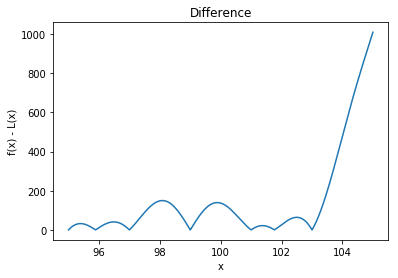

In [98]:
plot_error(5)

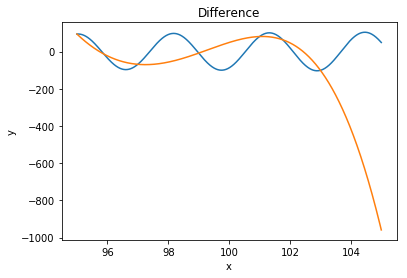

In [99]:
plot_graphics(5)

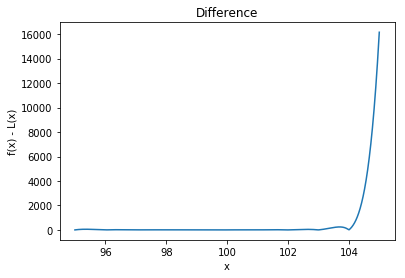

In [100]:
plot_error(10)

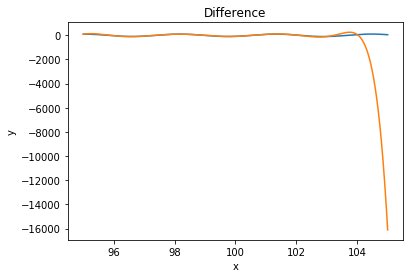

In [101]:
plot_graphics(10)

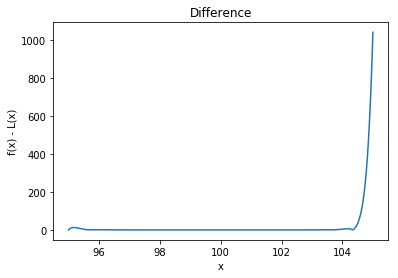

In [102]:
plot_error(15)

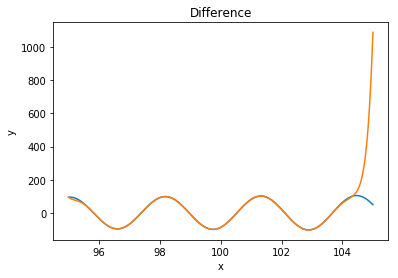

In [103]:
plot_graphics(15)

Как видим максимум погрешности достигается на концах промежутка (как было сказано на паре), при этом с ростом N она уменьшается, так как погрешность $O(h^{N+1})$ и $h = \frac{10}{N}$ убывает при росте $N$

## 1 b)

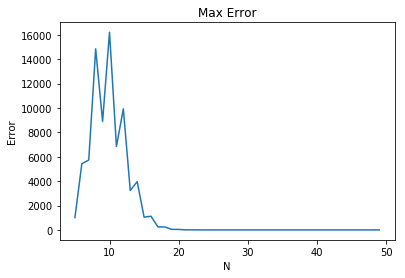

In [107]:
def max_error(N):
    step = 10 / N
    points_x = [Decimal(x_0 - 10 + i * step) for i in range(0, N)]
    points_y = [func(x) for x in points_x]
    return abs(func(x_0) - lagrange_interpolation(Decimal(x_0), points_x, points_y))
    
def plot_max_error():
    errors = []
    for N in range(5, 50):
        errors.append(max_error(N))
    plt.plot(range(5, 50), errors)
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.title('Max Error')
    plt.show() 
    
    
plot_max_error()

Так как погрешность $O(h^{N+1})$, а $h = \frac{10}{N}$, то после 10 погрешность стремительно убывает, до 10 ошибка растёт, так как $h > 1$, при этом т.к. при $N = 10$ достиается максимум, то скорее всего максимум 10 производной больше максимумов предыдущих. 

## 1 c)

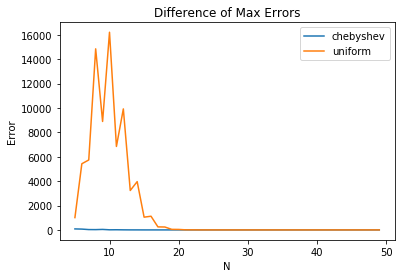

In [114]:
def max_error_uni(N):
    step = 10 / N
    points_x = [Decimal(x_0 - 10 + i * step) for i in range(0, N)]
    points_y = [func(x) for x in points_x]
    return abs(func(x_0) - lagrange_interpolation(Decimal(x_0), points_x, points_y))


def max_error_cheb(N):
    step = 10 / N
    points_x = [Decimal(math.cos(np.pi * (2 * k - 1) / 2 / N) * 5 + 100) for k in range(1, N)]
    points_y = [func(x) for x in points_x]
    return abs(func(x_0) - lagrange_interpolation(Decimal(x_0), points_x, points_y))

    
def plot_diff_max_error():
    errors_uni = []
    errors_cheb = []
    for N in range(5, 50):
        errors_uni.append(max_error_uni(N))
        errors_cheb.append(max_error_cheb(N))
    plt.plot(range(5, 50), errors_cheb, label='chebyshev')
    plt.plot(range(5, 50), errors_uni, label='uniform')
    plt.legend()
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.title('Difference of Max Errors')
    plt.show() 
    
    
plot_diff_max_error()

Чебышев гораздо более точен, так как его погрешность имеет логарифмическую асимптотику, в то время как равномерные точки -- экспонентную.

## 1 d)

In [198]:
def func(x):
    return Decimal(abs(x - 1))


def lagrange_interpolation_basis(x, points, excluded_x):
    f = Decimal(1)
    for x_i in points:
         if x_i != excluded_x:
                f *= Decimal((x - x_i)) / Decimal((excluded_x - x_i))
    return f
        
        
def lagrange_interpolation(x, points_x, points_y):
    f = Decimal(0)
    for i in range(0, len(points_x)):
        f += Decimal(points_y[i]) * Decimal(lagrange_interpolation_basis(x, points_x, points_x[i]))
    return f

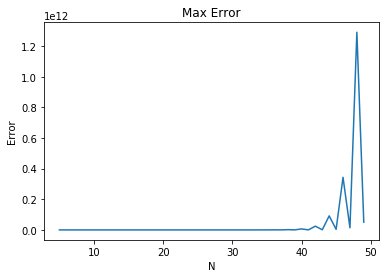

In [209]:
step_count = 100
eps = 1 / step_count

def max_error(N):
    points_x = np.arange(1, N + 2) * Decimal(2) / (N + 2)
    points_y = [func(x) for x in points_x]
    points = [i * eps for i in range(0, 2 * step_count)]
    max_error = Decimal(-1)
    return max([abs(func(Decimal(x)) - lagrange_interpolation(Decimal(x), points_x, points_y)) for x in points])
    
def plot_max_error():
    errors = []
    for N in range(5, 50):
        errors.append(max_error(N))
    plt.plot(range(5, 50), errors)
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.title('Max Error')
    plt.show() 
    
    
plot_max_error()

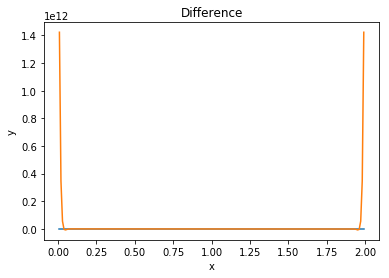

In [222]:
def plot_graphics(N):
    points_x = np.arange(1, N + 2) * 2 / (N + 2)
    points_y = [func(x) for x in points_x]
    k = [i * eps for i in range(1, 2 * step_count)]
    y_approx =[]
    y_func = []
    for x_i in k:
        y_approx.append(func(x_i))
        y_func.append(lagrange_interpolation(x_i, points_x, points_y))
    plt.plot(k, y_approx)
    plt.plot(k, y_func)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Difference')
    plt.show()   
    
    
plot_graphics(50)

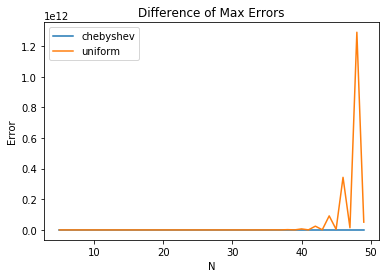

In [237]:
def max_error_uni(N):
    step = 2/ N
    points_x = np.arange(1, N + 2) * Decimal(2) / (N + 2)
    points_y = [func(x) for x in points_x]
    points = [i * eps for i in range(0, 2 * step_count)]
    return max([abs(func(Decimal(x)) - lagrange_interpolation(Decimal(x), points_x, points_y)) for x in points])


def max_error_cheb(N):
    step = 2 / N
    points_x = [Decimal(math.cos(np.pi * (2 * k - 1) / 2 / N) + 1) for k in range(1, N)]
    points_y = [func(x) for x in points_x]
    points = [i * eps for i in range(1, 2 * step_count)]
    return max([abs(func(Decimal(x)) - lagrange_interpolation(Decimal(x), points_x, points_y)) for x in points])

    
def plot_diff_max_error():
    errors_uni = []
    errors_cheb = []
    for N in range(5, 50):
        errors_uni.append(max_error_uni(N))
        errors_cheb.append(max_error_cheb(N))
    plt.plot(range(5, 50), errors_cheb, label='chebyshev')
    plt.plot(range(5, 50), errors_uni, label='uniform')
    plt.legend()
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.title('Difference of Max Errors')
    plt.show() 
    
    
plot_diff_max_error()

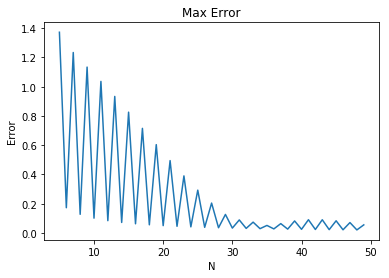

In [238]:
def plot_max_error_cheb():
    errors = []
    for N in range(5, 50):
        errors.append(max_error_cheb(N))
    plt.plot(range(5, 50), errors)
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.title('Max Error')
    plt.show() 
    
    
plot_max_error_cheb()

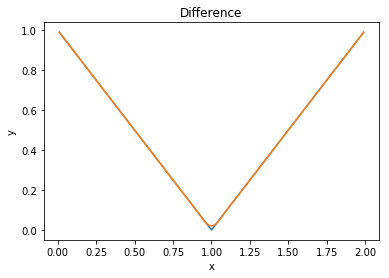

In [236]:
def plot_graphics_cheb(N):
    points_x = [math.cos(np.pi * (2 * k - 1) / 2 / N) + 1 for k in range(1, N)]
    points_y = [func(x) for x in points_x]
    k = [i * eps for i in range(1, 2 * step_count)]
    y_approx =[]
    y_func = []
    for x_i in k:
        y_approx.append(func(x_i))
        y_func.append(lagrange_interpolation(x_i, points_x, points_y))
    plt.plot(k, y_approx)
    plt.plot(k, y_func)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Difference')
    plt.show()   
    
    
plot_graphics_cheb(50)